## 📌 Load needed imports and libraries
---

In [91]:
# needed imports

# for loading files
import os

# for handling raw data
import json

# for dataframe manipulations
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# for pre-processing
import re
from ast import literal_eval
from bs4 import BeautifulSoup
from sklearn.preprocessing import MultiLabelBinarizer

## 📌 Load Video Game Data
---

In [92]:
datapath = r'C:\Users\Melzarr\OneDrive\Desktop\THESIS\sp_multilabel_vggtc\data_collection\final_collection\final_data2'

sample_vgdata1 = datapath + r'\data0_s40856.csv'
sample_vgdata2 = datapath + r'\data50000_s26445.csv'
sample_vgdata3 = datapath + r'\data100000_s34234.csv'
sample_vgdata4 = datapath + r'\data150000_s38936.csv'
sample_vgdata5 = datapath + r'\data200000_s21471.csv'

df1 = pd.read_csv(sample_vgdata1)
df2 = pd.read_csv(sample_vgdata2)
df3 = pd.read_csv(sample_vgdata3)
df4 = pd.read_csv(sample_vgdata4)
df5 = pd.read_csv(sample_vgdata5)

# concat_test = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

vgame0_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [93]:
vgame0_df.head(5)

,id,name,summary,genre_count,genre_list,genre_ids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12]


## 📌 Clean Text Summary  
---
**NOTE**: Cleaning summary text is subject to change. Need further advisement and changes on how to handle this.  
> Addressing these issues: 
> 1. How to handle user-generated text? (yes, IGDB game summary are apparently entered by users!)
> 2. Remove punctuations?

In [94]:
def pre_process(text):
    # fetch alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)

    # convert text to lower case
    text = text.lower()

    # split text into tokens to remove whitespaces
    tokens = text.split()

    return " ".join(tokens)

In [95]:
import string
from nltk.corpus import stopwords

def light_cleaning(x):
    # first we lowercase everything
    x = x.lower()
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    #x = re.sub(r'@\S', '', x)
    #x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    #x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    return x

def heavy_cleaning(x):
    # first we lowercase everything
    x = x.lower()
    x = ' '.join([word for word in x.split(' ') if word not in stopwords])
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    x = re.sub(r'@\S', '', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    # remove single letters and numbers surrounded by space
    x = re.sub(r'\s[a-z]\s|\s[0-9]\s', ' ', x)
    return x

In [96]:
vgame0_df['clean_summary'] = vgame0_df['summary'].apply(light_cleaning)

vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]",the ultimate thief is back! tread softly as yo...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]",thief is a first-person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]","in the third instalment of the thief series, m..."
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]",there is a rising tide of fear in the city. ha...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12],baldur gate is a fantasy role-playing video ga...
...,...,...,...,...,...,...,...
161937,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"['Strategy', 'Indie']","[15, 32]",experience the thrill of a modern conflict bet...
161938,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"['Adventure', 'Indie']","[31, 32]",the main character kaori is on a date boyfrien...
161939,234019,Forest Life,Players will play as five different characters...,2,"['Role-playing (RPG)', 'Indie']","[12, 32]",players will play as five different characters...
161940,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[""Hack and slash/Beat 'em up"", 'Arcade']","[25, 33]",streets of rage: silent hill is a fan game dev...


## 📌 Turning stringed `genre_list` to Pythonic list
---

In [97]:
vgame0_df['genre_list'] = vgame0_df['genre_list'].apply(literal_eval)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m..."
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...
...,...,...,...,...,...,...,...
161937,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...
161938,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...
161939,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...
161940,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage: silent hill is a fan game dev...


## 📌 EDA Proper
---

##### 📝 **Get Word Count of Text Summary**

count    161942.000000
mean         49.884669
std          50.718504
min           1.000000
25%          21.000000
50%          38.000000
75%          57.000000
max        1632.000000
dtype: float64

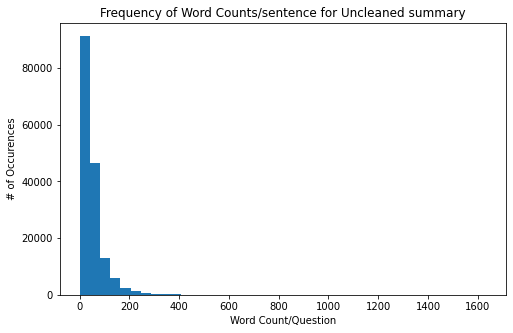

In [98]:
# for unclean text
summary_series = vgame0_df['summary']
word_count = [len(sentence.split()) for sentence in summary_series]

display(pd.Series(word_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_count, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence for Uncleaned summary")
plt.show()

In [99]:
# get games with clean_summary that is less than 10 words
filtered_summaries = vgame0_df[vgame0_df['clean_summary'].apply(lambda x: len(x.split()) <= 10)]
filtered_summaries.to_csv('filtered_summaries.csv', index=False)
filtered_summaries

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
104,105,Need for Speed: Hot Pursuit,Become Seacrest County's top cop or most wante...,1,[Racing],[10],become seacrest county top cop or most wanted ...
164,167,Star Wars: TIE Fighter - Defender of the Empire,Defender of the Empire adds 3 new Tours of Duty,1,[Simulator],[13],defender of the empire adds new tours of duty
257,268,Deer Hunter 3D,The Deer Hunter series goes mobile courtesy of...,3,"[Shooter, Simulator, Sport]","[5, 13, 14]",the deer hunter series goes mobile courtesy of...
258,269,Deer Hunter Challenge,Another mobile Deer Hunter.,3,"[Shooter, Simulator, Sport]","[5, 13, 14]",another mobile deer hunter.
607,631,Chessmaster 5500,Chessmaster 5500 is an updated version of Ches...,2,"[Sport, Strategy]","[14, 15]",chessmaster is an updated version of chessmast...
...,...,...,...,...,...,...,...
161867,233880,Side Scape,"A light-hearted, Side-Scroller/ Top-Down hybrid!",2,"[Adventure, Indie]","[31, 32]","a light-hearted, side-scroller/ top-down hybrid!"
161879,233894,Vacation Adventures: Park Ranger 13 - Collecto...,Help run Pinecreek Hills and New England's Min...,2,"[Adventure, Indie]","[31, 32]",help run pinecreek hills and new england minut...
161894,233918,Uppy Cup,Keep the ball in the air! Challenge your friends!,1,[Sport],[14],keep the ball in the air! challenge your friends!
161904,233959,Just Wak and Beats,"Fangame for ""Woowakgood"", based on ""Just Shape...",1,[Music],[7],"fangame for ""woowakgood"", based on ""just shape..."


In [100]:
# filter vgame0_df to only contain clean_summary with more than 10 words
vgame0_df = vgame0_df[vgame0_df['clean_summary'].apply(lambda x: len(x.split()) > 10)].copy().reset_index(drop=True)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m..."
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...
...,...,...,...,...,...,...,...
145758,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...
145759,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...
145760,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...
145761,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage: silent hill is a fan game dev...


count    145763.000000
mean         53.257541
std          49.945341
min          11.000000
25%          25.000000
50%          40.000000
75%          60.000000
max        1565.000000
dtype: float64

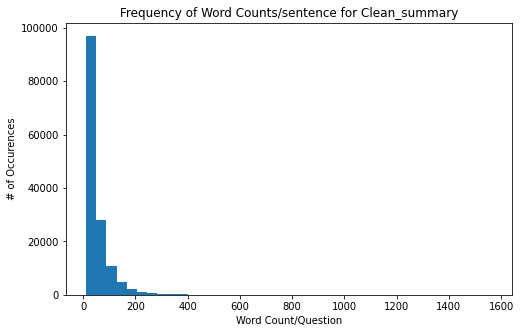

In [101]:
# for clean text
cleansummary_series = vgame0_df['clean_summary']
cleanword_count = [len(sentence.split()) for sentence in cleansummary_series]

display(pd.Series(cleanword_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(cleanword_count, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence for Clean_summary")
plt.show()

##### 📝 **Get Genre Type Counts**

<AxesSubplot: title={'center': 'Genre Type Count'}, xlabel='Genre', ylabel='Frequency of Genre'>

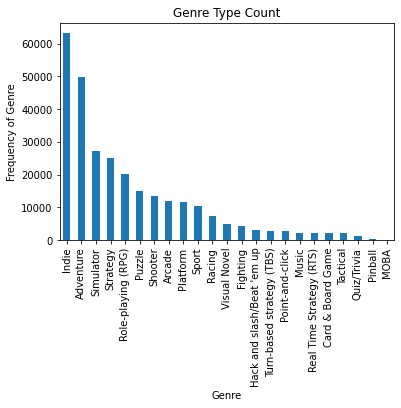

In [102]:
genrelist_copy = vgame0_df['genre_list'].explode('genre_list').reset_index(drop=True)
genretype_count = genrelist_copy.value_counts()
genretype_count

genretype_count.plot(kind='bar', title='Genre Type Count', xlabel='Genre', ylabel='Frequency of Genre')

In [103]:
# update genre_list because they are too many
adventure = ['Adventure', 'Visual Novel', 'Point-and-click']
action = ['Shooter', 'Platform', 'Hack and slash/Beat \'em up', 'Fighting']
arcade = ['Arcade', 'Pinball']
cardboard = ['Card & Board Game']
indie = ['Indie']
puzzle = ['Puzzle', 'Music']
quiz = ['Quiz/Trivia']
rpg = ['Role-playing (RPG)']
simulation = ['Sport', 'Simulator', 'Racing']
strategy = ['Strategy',  'Real Time Strategy (RTS)', 'Tactical', 'Turn-based strategy (TBS)', 'MOBA']

def convert_names(genre_list):
    genrelist_dict ={'adventure': adventure, 'action': action, 'arcade': arcade, 'cardboard': cardboard, 'indie': indie, 
                  'puzzle': puzzle, 'quiz': quiz, 'rpg': rpg, 'simulation': simulation, 'strategy': strategy}
    newlist = []
    
    for key in genrelist_dict:
        if any(genre in genre_list for genre in genrelist_dict[key]):
            newlist.append(key)

    return newlist

def convert_ids(genre_names):
    genreids_dict = {'adventure': 0, 'action': 1, 'arcade': 2, 'cardboard': 3, 'indie': 4, 
                  'puzzle': 5, 'quiz': 6, 'rpg': 7, 'simulation': 8, 'strategy': 9}
    newids = []
    
    for i in genre_names:
        newids.append(genreids_dict[i])
    
    return newids

In [104]:
vgame0_df['new_genrelist'] = vgame0_df['genre_list'].apply(convert_names)
vgame0_df['new_genreids'] = vgame0_df['new_genrelist'].apply(convert_ids)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...,"[adventure, action, simulation]","[0, 1, 8]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...,"[adventure, simulation]","[0, 8]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m...","[adventure, action, simulation]","[0, 1, 8]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...,"[adventure, action]","[0, 1]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...,[rpg],[7]
...,...,...,...,...,...,...,...,...,...
145758,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...,"[indie, strategy]","[4, 9]"
145759,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...,"[adventure, indie]","[0, 4]"
145760,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...,"[indie, rpg]","[4, 7]"
145761,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage: silent hill is a fan game dev...,"[action, arcade]","[1, 2]"


In [105]:
vgame0_df.to_csv('clean_test2.csv', index=False)

<AxesSubplot: title={'center': 'Updated Genre Type Count'}, xlabel='Genre', ylabel='Frequency of Genre'>

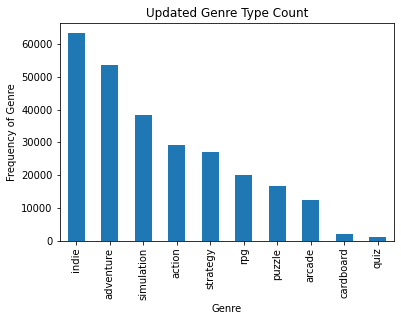

In [106]:
newgenrelist_copy = vgame0_df['new_genrelist'].explode('new_genrelist').reset_index(drop=True)
newgenretype_count = newgenrelist_copy.value_counts()
newgenretype_count

newgenretype_count.plot(kind='bar', title='Updated Genre Type Count', xlabel='Genre', ylabel='Frequency of Genre')

##### 📝 **Get Genre Count Frequency**

1     62002
2     47031
3     24109
4      9115
5      2751
6       571
7       138
8        33
9         8
10        3
20        1
15        1
Name: genre_count, dtype: int64
145763


<AxesSubplot: title={'center': 'Genre Frequency Count'}, xlabel='# of Genres per Game', ylabel='# of Games'>

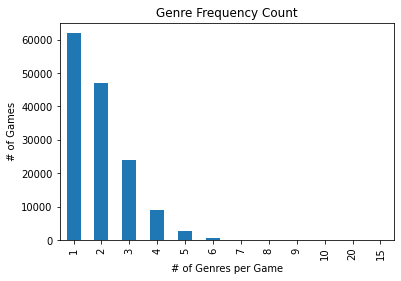

In [107]:
genrecount_freq = pd.value_counts(vgame0_df['genre_count'])
print(genrecount_freq)
print(genrecount_freq.sum())

genrecount_freq.plot(kind='bar', title='Genre Frequency Count', xlabel='# of Genres per Game', ylabel='# of Games')

In [108]:
vgame0_df['new_genrecount'] = vgame0_df['new_genrelist'].str.len()
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids,new_genrecount
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...,"[adventure, action, simulation]","[0, 1, 8]",3
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...,"[adventure, simulation]","[0, 8]",2
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m...","[adventure, action, simulation]","[0, 1, 8]",3
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...,"[adventure, action]","[0, 1]",2
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...,[rpg],[7],1
...,...,...,...,...,...,...,...,...,...,...
145758,234017,Commander: Modern War,Experience the thrill of a modern conflict bet...,2,"[Strategy, Indie]","[15, 32]",experience the thrill of a modern conflict bet...,"[indie, strategy]","[4, 9]",2
145759,234018,Abandoned Drive-in,The main character Kaori is on a date boyfrien...,2,"[Adventure, Indie]","[31, 32]",the main character kaori is on a date boyfrien...,"[adventure, indie]","[0, 4]",2
145760,234019,Forest Life,Players will play as five different characters...,2,"[Role-playing (RPG), Indie]","[12, 32]",players will play as five different characters...,"[indie, rpg]","[4, 7]",2
145761,234020,Silent Hill 2: Streets of Rage,Streets of Rage: Silent Hill is a 2015 fan gam...,2,"[Hack and slash/Beat 'em up, Arcade]","[25, 33]",streets of rage: silent hill is a fan game dev...,"[action, arcade]","[1, 2]",2


1    68140
2    47667
3    21362
4     6896
5     1493
6      180
7       23
9        1
8        1
Name: new_genrecount, dtype: int64
145763


<AxesSubplot: title={'center': 'Updated Genre Frequency Count'}, xlabel='# of Genres per Game', ylabel='# of Games'>

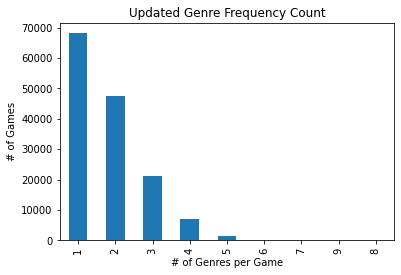

In [109]:
newgenrecount_freq = pd.value_counts(vgame0_df['new_genrecount'])
print(newgenrecount_freq)
print(newgenrecount_freq.sum())

newgenrecount_freq.plot(kind='bar', title='Updated Genre Frequency Count', xlabel='# of Genres per Game', ylabel='# of Games')

## 📌 Multilabel Binarization
---

In [110]:
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(vgame0_df['new_genrelist'])
yt.shape

(145763, 10)

In [111]:
print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[1 1 0 0 0 0 0 0 1 0]
[('action', 'adventure', 'simulation')]
['action' 'adventure' 'arcade' 'cardboard' 'indie' 'puzzle' 'quiz' 'rpg'
 'simulation' 'strategy']


In [112]:
yt

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

## Final Data
---

The text data

In [113]:
vgame0_df[['id','clean_summary']]

,id,clean_summary
0,1,the ultimate thief is back! tread softly as yo...
1,2,thief is a first-person stealth game that like...
2,3,"in the third instalment of the thief series, m..."
3,4,there is a rising tide of fear in the city. ha...
4,5,baldur gate is a fantasy role-playing video ga...
...,...,...
145758,234017,experience the thrill of a modern conflict bet...
145759,234018,the main character kaori is on a date boyfrien...
145760,234019,players will play as five different characters...
145761,234020,streets of rage: silent hill is a fan game dev...


In [114]:
vgame0_df[['id','clean_summary','new_genrelist']].to_csv(r'final_data/videogamedata_summary.csv', index=False)

vga

The tag data

In [115]:
print(yt)
print(len(yt))

[[1 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]
145763


In [116]:
type(yt)

numpy.ndarray

In [117]:
xf = vgame0_df['clean_summary']
xf

0         the ultimate thief is back! tread softly as yo...
1         thief is a first-person stealth game that like...
2         in the third instalment of the thief series, m...
3         there is a rising tide of fear in the city. ha...
4         baldur gate is a fantasy role-playing video ga...
                                ...                        
145758    experience the thrill of a modern conflict bet...
145759    the main character kaori is on a date boyfrien...
145760    players will play as five different characters...
145761    streets of rage: silent hill is a fan game dev...
145762    experience super stardust portable originally ...
Name: clean_summary, Length: 145763, dtype: object

In [118]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

# First Split for Train and Test
x_train,x_test,y_train,y_test = train_test_split(xf, yt, test_size=0.1, random_state=RANDOM_SEED,shuffle=True)
# Next split Train in to training and validation
x_tr,x_val,y_tr,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=RANDOM_SEED,shuffle=True)